In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import pandas 

from lib import loading

df = loading.load_data()
print("We have {0} labelled examples.".format(len(df)))

Read the data file from ./airline-twitter-sentiment/Tweets.csv
We have 14640 labelled examples.


## We will try various classification algorithms

We will try the following:
* Naive Bayes
* kNearest Neighbours
* SVM
* Gradient Descent
* Random Forest

We mention that in this docuemnt we take the best options that we have found, after exploring the hyperparameter space for each algorithm in its own separate Notebook.

In [2]:
from lib import processing

training_data, testing_data = processing.process_data(df, sample_size=1)

Using a total of 14640 tweets
Training sample size: 13151
Testing sample size: 1489


In [3]:
from sklearn.metrics import confusion_matrix
from lib import classify
from nltk.sentiment import SentimentAnalyzer

sentim_analyzer = SentimentAnalyzer()
classify.add_features(training_data, sentim_analyzer)
train, test = classify.extract_features(training_data, testing_data, sentim_analyzer)

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(3)
    plt.xticks(tick_marks, ['negative', 'neutal', 'positive'], rotation=45)
    plt.yticks(tick_marks, ['negative', 'neutal', 'positive'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def print_evaluation(evaluation):
    for key, value in sorted(evaluation.items()):
        print(key, ":", value)

def evaluate_trainer(trainer):
    classifier, evaluation, _ = classify.train_model(train, test, sentim_analyzer, trainer)
    y_test = [y for _, y in test]
    y_pred = [classifier.classify(f) for f, _ in test]
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm)
    print_evaluation(evaluation)
    return classifier

Number of features: 1725


## Naive Bayes

Training: Naive Bayes Classifier
Training classifier
Evaluating NaiveBayesClassifier results...
Accuracy : 0.7797179314976495
F-measure [negative] : 0.8576122672508215
F-measure [neutral] : 0.6206896551724138
F-measure [positive] : 0.7003891050583657
Precision [negative] : 0.8642384105960265
Precision [neutral] : 0.6366559485530546
Precision [positive] : 0.6617647058823529
Recall [negative] : 0.8510869565217392
Recall [neutral] : 0.6055045871559633
Recall [positive] : 0.743801652892562


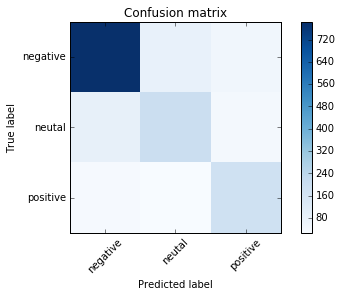

In [4]:
from nltk.classify import NaiveBayesClassifier
trainer = {
    'name': 'Naive Bayes Classifier',
    'train': NaiveBayesClassifier.train,
}
naive_bayes = evaluate_trainer(trainer)


## K Nearest Neighbours

Training: K Nearest Neighbours Classifier
Training classifier
Evaluating SklearnClassifier results...
Accuracy : 0.5312290127602418
F-measure [negative] : 0.614569536423841
F-measure [neutral] : 0.4115384615384616
F-measure [positive] : 0.5280373831775701
Precision [negative] : 0.7864406779661017
Precision [neutral] : 0.30014025245441794
Precision [positive] : 0.6075268817204301
Recall [negative] : 0.5043478260869565
Recall [neutral] : 0.654434250764526
Recall [positive] : 0.4669421487603306


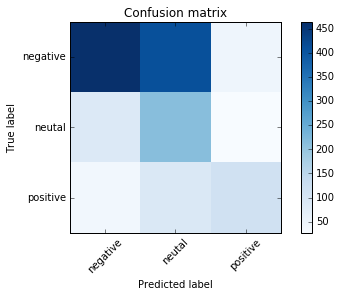

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from nltk.classify import SklearnClassifier
trainer = {
    "name": "K Nearest Neighbours Classifier",
    "train": SklearnClassifier(KNeighborsClassifier()).train,
}
knn = evaluate_trainer(trainer)

## SVM

Training: Linear SVC Classifier
Training classifier
Evaluating SklearnClassifier results...
Accuracy : 0.7857622565480188
F-measure [negative] : 0.8646055437100213
F-measure [neutral] : 0.610223642172524
F-measure [positive] : 0.7058823529411765
Precision [negative] : 0.8483263598326359
Precision [neutral] : 0.6387959866220736
Precision [positive] : 0.717948717948718
Recall [negative] : 0.8815217391304347
Recall [neutral] : 0.5840978593272171
Recall [positive] : 0.6942148760330579


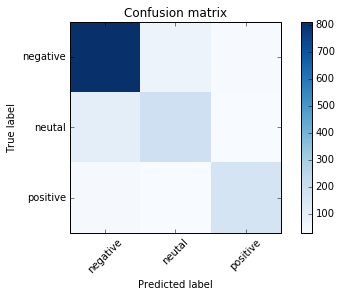

In [15]:
from sklearn.svm import LinearSVC
from nltk.classify import SklearnClassifier
trainer = {
    "name": "Linear SVC Classifier",
    "train": SklearnClassifier(LinearSVC(dual = False, # because number of samples > number of features,
                                        )).train,
}
svm = evaluate_trainer(trainer)

## Gradient Descent

Training: Gradient Descent Classifier
Training classifier
Evaluating SklearnClassifier results...
Accuracy : 0.77367360644728
F-measure [negative] : 0.8562334217506631
F-measure [neutral] : 0.5801282051282051
F-measure [positive] : 0.6993603411513859
Precision [negative] : 0.8362694300518134
Precision [neutral] : 0.6094276094276094
Precision [positive] : 0.7224669603524229
Recall [negative] : 0.8771739130434782
Recall [neutral] : 0.5535168195718655
Recall [positive] : 0.6776859504132231


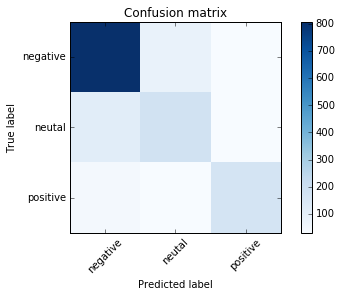

In [14]:
from sklearn.linear_model import SGDClassifier
trainer = {
    "name": "Gradient Descent Classifier",
    "train": SklearnClassifier(SGDClassifier()).train,
}
gradient_descent = evaluate_trainer(trainer)

In [ ]:
## Random Forest

Training: Random Forest Classifier
Training classifier
Evaluating SklearnClassifier results...
Accuracy : 0.7447951645399598
F-measure [negative] : 0.8416709644146468
F-measure [neutral] : 0.5016835016835017
F-measure [positive] : 0.6471910112359551
Precision [negative] : 0.8007850834151129
Precision [neutral] : 0.5580524344569289
Precision [positive] : 0.7093596059113301
Recall [negative] : 0.8869565217391304
Recall [neutral] : 0.45565749235474007
Recall [positive] : 0.5950413223140496


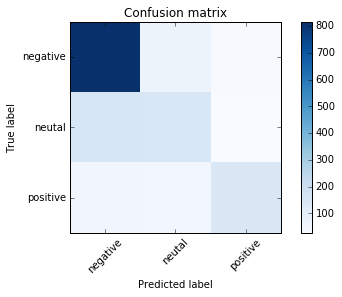

In [16]:
from sklearn.ensemble import RandomForestClassifier
trainer = {
    "name": "Random Forest Classifier",
    "train": SklearnClassifier(RandomForestClassifier()).train,
}
random_forest = evaluate_trainer(trainer)